# Homework 1

- Last name: TRESSEL
- First Name: Thomas

Homework must be sent to `pwinant@escp.eu` by email before May 5th.

You are welcome to install any library, take any initiative you deem appropriate and encourage to help each other (but not copy/paste code).

---
## Exercise 1: Linear Regression

1. __For $N=100$, compute a sample $(x_i, y_i)_{i=[1:N]}$ satisfying $$y_i=0.4+2.5 x_i + \epsilon_i$$ where $x_i$ uniformly distributed between 0 and 1 and $\epsilon_i$ is drawn from a normal distribution with standard deviation 0.5.__

In [1]:
import Pkg; Pkg.add("Distributions")

using Random, Distributions

    Updating registry at `C:\Users\tress\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


In [2]:
sample = []
for n = 1:100
    x = rand()
    y = 0.4 + 2.5*x + rand(Normal(0.0, 0.5))
    push!(sample, [x,y])
end
sample

100-element Vector{Any}:
 [0.8440529651847242, 2.821394164068551]
 [0.6268801864232942, 2.5759090395000523]
 [0.9036232850691931, 2.5569441752255995]
 [0.15552425163485684, 0.33279459838676356]
 [0.5240379748987313, 1.9540699520207028]
 [0.7475947644804094, 2.218491811890702]
 [0.36766164820480607, 0.5628156207885262]
 [0.18676056428036025, 0.34501428658204936]
 [0.885312987649646, 2.9617363343843777]
 [0.6839218394584339, 2.324652122990863]
 ⋮
 [0.8682176722904605, 3.75541455664992]
 [0.8126061493758805, 1.9332102757691323]
 [0.293125878602014, 1.2844039400714162]
 [0.2931197195182761, 1.2967703664863262]
 [0.9537310951649987, 3.1417184055737764]
 [0.9078535103920912, 2.845685647713935]
 [0.5255433227934208, 2.8177321997938587]
 [0.2134649304436942, 0.19419930328346968]
 [0.3729523251881445, 0.8258342366212789]

2. __Define the model $f(x;a,b)=a+b x$. Find the parameters $a$ and $b$ which minimize the objective $\xi(a,b)=\sum_i (f(x_i;a,b)-y_i)^2$ by using a numerical optimization algorithm (not the formula for the regression). Plot.__

<mark>Hint</mark>: you can write your own gradient descent algorithm or use an optimization library).

In [3]:
Pkg.add("Optim")

using Optim

   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


In [4]:
Pkg.add("Plots")

using Plots

   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


In [5]:
f_ex1(x;a,b) = a + b*x

f_ex1 (generic function with 1 method)

In [6]:
function ξ(v)
    a = v[1]
    b = v[2]
    return sum((f_ex1(sample[i][1];a,b) - sample[i][2])^2 for i=1:100)
end

ξ (generic function with 1 method)

In [7]:
result_ex1 = optimize(ξ, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     2.520393e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    53
    f(x) calls:    107


In [8]:
result_ex1.minimizer

2-element Vector{Float64}:
 0.31144125923247284
 2.5157689706824247

In [9]:
f_fit(x) = result_ex1.minimizer[1] + result_ex1.minimizer[2]*x

f_fit (generic function with 1 method)

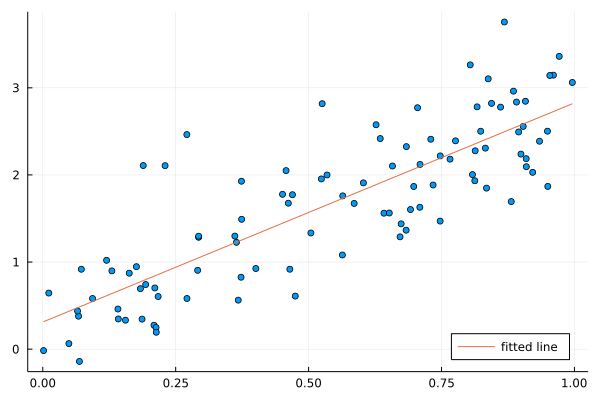

In [10]:
x = [sample[i][1] for i=1:100]
y = [sample[i][2] for i=1:100]
pl = plot()
plot!(x, y, seriestype = :scatter, label = "")
plot!(f_fit, label = "fitted line", legend=:bottomright)

---

## Exercise 2: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [11]:
f_ex2(x) = - (1 - (x[1] - 0.5)^2 - (x[2] - 0.3)^2)

f_ex2 (generic function with 1 method)

In [12]:
result_ex2 = optimize(f_ex2, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    66


In [13]:
result_ex2.minimizer

2-element Vector{Float64}:
 0.5000172833186103
 0.2999408484491455

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [14]:
lower = [-Inf, -Inf]
upper = [0.3, Inf]
optimize(f_ex2, lower, upper, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     -9.600000e-01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 1.20e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.83e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.20e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    3
    f(x) calls:    56
    ∇f(x) calls:   56


__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

We write the following function:
$$
g(x) = 1 - (x-0.5)^2 - (y-0.3)^2 + \lambda (0.3 - x)
$$

From which we get the following complementarity conditions:
- $\lambda \geq 0$
- $0.3 - x \geq 0$
- $\lambda (0.3 - x) = 0$

We can hence write first-order conditions which factor in the constraints:
- $-2(x-0.5) - \lambda = 0$
- $-2(y-0.3) = 0$
- $0.3 - x = 0$

Solving this gives us $x = y = 0.3$.

__Solve using NLSolve.jl__

In [15]:
Pkg.add("NLsolve")

using NLsolve

   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


---

## Exercise 3: Learning simple decision rules in the Consumption-Savings model

This exercise is inspired from *Individual learning about consumption* by Todd Allen and Chris Carroll [link](https://www.econstor.eu/bitstream/10419/72016/1/328292125.pdf).


We consider the following consumption saving problem. An agent receives random income $y_t = \exp(\epsilon_t)$ where $\epsilon_t\sim \mathcal{N}(\sigma)$ ($\sigma$ is the standard deviation.)

Consumer starts the period with available income $w_t$. The law of motion for available income is:

$$w_t = \exp(\epsilon_t) + (w_{t-1}-c_{t-1}) r$$

where consumption $c_t \in ]0,w_t]$ is chosen in each period in order to maximize:

$$E_t \sum_{t=0}^T \beta^t U(c_t)$$

given initial available income $w_0$.

In the questions below, we will use the following calibration:
- $\beta = 0.9$
- $\sigma = 0.1$
- $T=100$
- $U(x) = \frac{x^{1-\gamma}}{1-\gamma}$ with $\gamma=2$
- $w_0 = 1.1$ (alternatively, consider values 0.5 and 1)

The theoretical solution to this problem is a concave function $\varphi$ such that $\varphi(x)\in ]0,x]$ and $\forall t,  c_t=\varphi(w_t)$. Qualitatively, agents accumulate savings, up to a certain point (a buffer stock), beyond which wealth is not increasing any more (in expectation).

Carroll and Allen have noticed that the true solution can be approximated very well by a simple rule:

$\psi(x) = \min(x, \theta_0 + \theta_1 (x - \theta_0) )$

The main question they ask in the aforementioned paper is whether it is realistic that agents would learn good values of $\theta_0$ and $\theta_1$ by observing past experiences.

We would like to examine this result.

### Lifetime reward

__Define a NamedTuple to hold the parameter values__

In [55]:
p = (β=0.9, σ=0.1, T=100, γ=2, r=1.01)

(β = 0.9, σ = 0.1, T = 100, γ = 2, r = 1.01)

__Define simple rule fonction `consumption(w::Number, θ_0::Number, θ_1::Number, p::NamedTuple)`
which compute consumption using a simple rule. What is the meaning of $\theta_0$ and $\theta_1$? Make a plot in the space $w,c$, including consumption rule and the line where $w_{t+1} = w_t$.__

(remark for later: `Number` type is compatible with ForwardDiff.jl 😉)

In [56]:
function consumption(w::Number, θ_0::Number, θ_1::Number, p::NamedTuple)
    return min(w, θ_0 + θ_1*(w - θ_0))
end

consumption (generic function with 1 method)

In [57]:
θ_0 = 0.5
θ_1 = 0.5

0.5

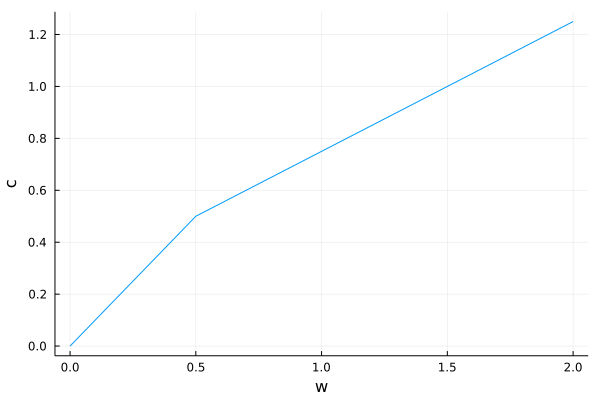

In [58]:
input = [i/100 for i=0:200]
output = [consumption(i/100, θ_0, θ_1, p) for i=0:200]
pl2 = plot()
plot!(input, output, label = "", xaxis = "w", yaxis = "c")

__Write a function `lifetime_reward(w_0::Number, θ_0::Number, θ_1::Number, p::NamedTuple)` which computes one realization of $\sum \beta^t U(c_t)$ for initial wealth `w_0` and simple rule `θ_0`, `θ_1`. Mathematically, we denote it by $\xi(\omega; \theta_0, \theta_1)$, where $\omega$ represents the succession of random income draws.__

In [59]:
U(x, γ) = (x^(1 - γ)) / (1 - γ)

U (generic function with 1 method)

In [60]:
function lifetime_reward(w_0::Number, θ_0::Number, θ_1::Number, p::NamedTuple)
    ans = 0
    w = w_0
    for i=1:p.T
        c = consumption(w, θ_0, θ_1, p)
        ans += p.β^i * U(c, p.γ)
        ϵ = rand(Normal(1.0, p.σ))
        w = exp(ϵ) + (w - c)*p.r
    end
    return ans
end

lifetime_reward (generic function with 1 method)

In [61]:
lifetime_reward(1.1, θ_0, θ_1, p)

-4.4157553196944885

__Write a function `expected_lifetime_reward(w_0::Number, θ_0::Number, θ_1::Number,  p::NamedTuple; N=1000)` which computes expected lifetime reward using `N` Monte-Carlo draws. Mathematically, we write it $\Xi^{N}(\theta_0, \theta_1) =\frac{1}{N} \sum_1^N {\xi(\omega_N; \theta_0, \theta_1)}$. Check empirically that standard deviation of these draws decrease proportionally to $\frac{1}{\sqrt{N}}$ .__

In [69]:
function expected_lifetime_reward(w_0::Number, θ_0::Number, θ_1::Number,  p::NamedTuple; N=1000)
    return [lifetime_reward(1.1, θ_0, θ_1, p) for i=1:N]
end

expected_lifetime_reward (generic function with 1 method)

In [70]:
sims = expected_lifetime_reward(1.1, θ_0, θ_1, p)

1000-element Vector{Float64}:
 -4.341174729583244
 -4.302123775513631
 -4.229414700387363
 -4.488299438688883
 -4.337125385285415
 -4.307920378111112
 -4.273520096458039
 -4.481188813223755
 -4.245194569207338
 -4.375976730189373
  ⋮
 -4.394238340078606
 -4.422465020107278
 -4.254069720009034
 -4.27594510073309
 -4.299714835777653
 -4.464409465697112
 -4.2225853300103955
 -4.21447064383418
 -4.301341600845305

In [71]:
Pkg.add("Statistics")

using Statistics

   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


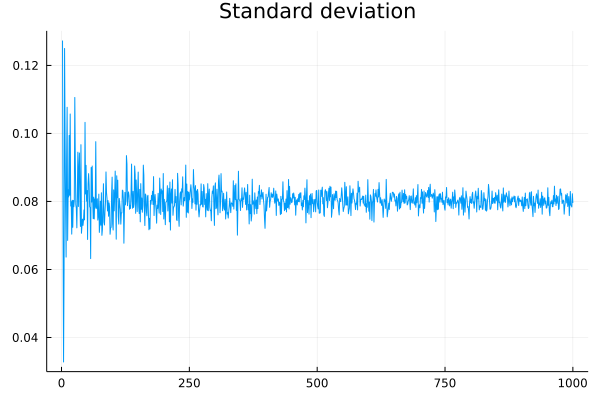

In [72]:
input_MC = [i for i=1:1000]
output_MC = [std(expected_lifetime_reward(1.1, θ_0, θ_1, p; N=i)) for i=1:1000]
pl3 = plot()
plot!(input_MC, output_MC, label="", title="Standard deviation")
# The standard deviation of the draws does not seem to decrease proportionally to 1/sqrt(N)
# I cannot identify where I made a mistake

__Using a high enough number for `N`, compute optimal values for $\theta_0$ and $\theta_1$. What is the matching value for the objective function converted into an equivalent stream of determinstic consumption ? That is if `V` is the approximated value computed above, what is $\bar{c}\in \R$ such that $ V= \sum_{t=0}^T \beta^t U(\bar{c})$ ?__


__Using a high enough number for `N`, make contour plots of lifetime rewards as a function of `θ_0` and `θ_1`. Ideally, represent lines with $1\%$ consumption loss, $5\%$ and $10\%$ deterministic consumption loss w.r.t. to maximum.__

### Learning to save

__We now focus on the number of steps it takes to optimize $\theta_0$, $\theta_1$.__

__Implement a function `∇(θ::Vector; N=1000)::Vector` which computes the gradient of the objective w.r.t. `θ==[θ_0,θ_1]`. (You need to use automatic differentiation, otherwise you might get incorrect results).__

__Implement a gradient descent algorithm to maximize $\Xi^N(\theta_0, \theta_1)$ using learning rate $\lambda \in ]0,1]$. Stop after a predefined number of iterations. Compare convergence speed for different values of $\lambda$ and plot them on the $\theta_0, \theta_1$ plan. How many steps does it take to enter the `1%` error zone? The `5%` and the `10%` error zone?__

__Even for big N, the evaluated value of ∇ are stochastic, and always slightly inaccurate. In average, they are non-biased and the algorithm converges in expectation (it fluctuates around the maximum). This is called the stochastic gradient method.__

__What are the values of $N$ and $\lambda$ which minimize the number of iterations before reaching the target zones (at 1%, 2%, etc...)? How many simulations periods does it correspond to? Would you say it is realistic that consumers learn from their own experience?__